In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("Downloads/train (1).csv")
test=pd.read_csv("Downloads/test (1).csv")

In [3]:
x=train.drop(['SalePrice'],axis='columns')
y=train.SalePrice

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
train=train.drop(['MiscFeature','Fence','PoolQC','FireplaceQu','Alley'],axis='columns')

In [11]:
test=test.drop(['MiscFeature','Fence','PoolQC','FireplaceQu','Alley'],axis='columns')

In [7]:
train.shape

(1460, 76)

In [12]:
test.shape

(1459, 75)

In [14]:
y=train.SalePrice

In [16]:
train.drop(['SalePrice'],axis='columns',inplace=True)

In [17]:
train.shape,test.shape

((1460, 75), (1459, 75))

In [18]:
total_data=pd.concat([train,test],axis='rows')

In [19]:
total_data.shape

(2919, 75)

In [23]:
import seaborn as sb

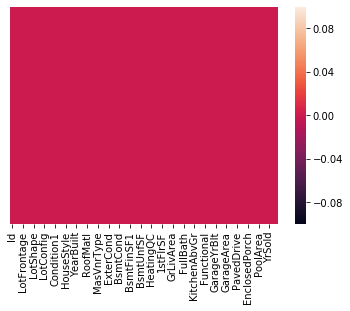

In [121]:
sb.heatmap(total_data.isnull(),yticklabels=False)

In [120]:
pd.DataFrame(total_data.isnull().sum()).head(60)

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0


In [37]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 75 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

In [34]:
total_data.MSZoning.value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [35]:
total_data.MSZoning=total_data.MSZoning.fillna(total_data.MSZoning.mode()[0])

In [38]:
total_data.LotFrontage=total_data.LotFrontage.fillna(total_data.LotFrontage.mean())

In [49]:
total_data.Utilities.value_counts()

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

In [48]:
total_data.Utilities=total_data.Utilities.fillna("AllPub")

In [53]:
total_data.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
CBlock        2
AsphShn       2
Stone         2
ImStucc       1
Name: Exterior1st, dtype: int64

In [54]:
total_data.Exterior1st.fillna("VinylSd",inplace=True)

In [55]:
total_data.Exterior1st.isnull().sum()

0

In [56]:
total_data.Exterior2nd.fillna(total_data.Exterior2nd.mode()[0],inplace=True)

In [57]:
total_data.Exterior2nd.isnull().sum()

0

In [59]:
total_data.MasVnrType.fillna(total_data.MasVnrType.mode()[0],inplace=True)

In [60]:
total_data.MasVnrArea.fillna(total_data.MasVnrArea.mean(),inplace=True)

In [63]:
total_data.BsmtQual.fillna(total_data.BsmtQual.mode()[0],inplace=True)

In [66]:
total_data.BsmtCond.fillna(total_data.BsmtCond.mode()[0],inplace=True)

In [67]:
total_data.BsmtExposure.fillna(total_data.BsmtExposure.mode()[0],inplace=True)

In [68]:
total_data.BsmtFinType1.fillna(total_data.BsmtFinType1.mode()[0],inplace=True)

In [70]:
total_data.BsmtFinType2.fillna(total_data.BsmtFinType2.mode()[0],inplace=True)

In [72]:
total_data.BsmtFinSF1.fillna(total_data.BsmtFinSF1.mean(),inplace=True)

In [73]:
total_data.BsmtFinSF2.fillna(total_data.BsmtFinSF2.mean(),inplace=True)

In [75]:
total_data.BsmtUnfSF.fillna(total_data.BsmtUnfSF.mean(),inplace=True)

In [76]:
total_data.TotalBsmtSF.fillna(total_data.TotalBsmtSF.mean(),inplace=True)

In [79]:
total_data.Electrical.fillna(total_data.Electrical.mode()[0],inplace=True)

In [80]:
total_data.BsmtFullBath.fillna(total_data.BsmtFullBath.mean(),inplace=True)
total_data.BsmtHalfBath.fillna(total_data.BsmtHalfBath.mean(),inplace=True)

In [84]:
total_data.KitchenQual.fillna(total_data.KitchenQual.mode()[0],inplace=True)

In [85]:
total_data.Functional.fillna(total_data.Functional.mode()[0],inplace=True)

In [88]:
total_data.GarageType.fillna(total_data.GarageType.mode()[0],inplace=True)

In [96]:
total_data.GarageYrBlt.fillna(2005.0,inplace=True)

In [98]:
total_data.GarageYrBlt.isnull().sum()

0

In [99]:
total_data.GarageFinish.fillna(total_data.GarageFinish.mode()[0],inplace=True)

In [101]:
total_data.GarageCars.value_counts()

2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [102]:
total_data.GarageCars.fillna(2.0,inplace=True)

In [109]:
total_data.GarageArea.value_counts()

0.0      158
576.0     97
440.0     96
240.0     69
484.0     68
        ... 
443.0      1
424.0      1
263.0      1
962.0      1
803.0      1
Name: GarageArea, Length: 603, dtype: int64

In [108]:
total_data.GarageArea.fillna(0.0,inplace=True)

In [113]:
total_data.GarageCond.value_counts()

TA    2813
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

In [114]:
total_data.GarageQual.value_counts()

TA    2763
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

In [112]:
total_data.GarageCond.fillna(total_data.GarageCond.mode()[0],inplace=True)
total_data.GarageQual.fillna(total_data.GarageQual.mode()[0],inplace=True)


In [118]:
total_data.SaleType.value_counts()

WD       2526
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [117]:
total_data.SaleType.fillna(total_data.SaleType.mode()[0],inplace=True)


In [125]:
copy_df=total_data.copy()

In [126]:
total_data=total_data.drop(['Id'],axis='columns')

In [127]:
total_data.shape

(2919, 74)

In [134]:
train.shape

(1460, 74)

In [136]:
test.shape

(1459, 74)

In [130]:
y.shape

(1460,)

In [157]:
total_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [164]:
categorical_feature=[]
for x in total_data.columns:
    if total_data[x].dtypes=='O':
        categorical_feature.append(x)

In [195]:
categorical_feature

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [198]:
copy_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal


In [222]:
final_df=copy_df.copy()

In [226]:
final_df=final_df.drop(['Id'],axis='columns',)

In [228]:
copy_df=final_df.copy()

In [229]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 74 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2919 no

In [231]:
len(categorical_feature)

38

In [232]:
for feature in categorical_feature:
    temp_df=pd.get_dummies(final_df[feature],drop_first=True)
    final_df=final_df.drop([feature],axis='columns')
    final_df=pd.concat([final_df,temp_df],axis='columns')

In [233]:
final_df.shape

(2919, 232)

In [240]:
final_df=final_df.loc[:,~final_df.columns.duplicated()]

In [241]:
final_df.shape

(2919, 176)

In [243]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [322]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [247]:
train=final_df.iloc[:1460]
test=final_df.iloc[1460:]

In [248]:
train.shape,test.shape

((1460, 176), (1459, 176))

In [320]:
train.to_csv("HousePriceRegressionTrain.csv",index=False)
test.to_csv("HousePriceRegressionTest.csv",index=False)
y.to_csv("HousePriceRegressionYYYY.csv",index=False)

C:\Users\Chirag M. Sidhdhapur\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [282]:
hyper={
    'RandomForestRegressor':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[500,750,],
        }
    }
}

In [295]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [275]:
from sklearn.model_selection import GridSearchCV

In [283]:
gscv=GridSearchCV(hyper['model_name']['model'],hyper['model_name']['params'],cv=5,return_train_score=False)

In [284]:
gscv.fit(train,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': [500, 750, 1000

In [285]:
gscv.best_score_

0.8565031574072219

In [287]:
gscv.best_params_

{'n_estimators': 1000}

In [314]:
regressor=RandomForestRegressor(n_estimators=400)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [315]:
regressor.fit(train,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [316]:
y_pred=regressor.predict(test)

In [317]:
len(y_pred)

1459

In [311]:
index=range(1461,2920)

In [318]:
output_df=pd.DataFrame({"Id":index,"SalePrice":y_pred})

In [319]:
output_df.to_csv("HousePriceSubmission.csv",index=False)

In [299]:
len(y_pred)

1459